<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Непараметрические-критерии" data-toc-modified-id="Непараметрические-критерии-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Непараметрические критерии</a></span></li><li><span><a href="#Одновыборочные-критерии" data-toc-modified-id="Одновыборочные-критерии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Одновыборочные критерии</a></span><ul class="toc-item"><li><span><a href="#Критерий-знаков" data-toc-modified-id="Критерий-знаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span><strong>Критерий знаков</strong></a></span></li><li><span><a href="#Критерий-Уилкоксона." data-toc-modified-id="Критерий-Уилкоксона.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span><strong>Критерий Уилкоксона.</strong></a></span></li></ul></li><li><span><a href="#Двухвыборочные-(несвязанные-выборки)" data-toc-modified-id="Двухвыборочные-(несвязанные-выборки)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Двухвыборочные (несвязанные выборки)</a></span><ul class="toc-item"><li><span><a href="#Ранговый-критерий-Мана-Уитни" data-toc-modified-id="Ранговый-критерий-Мана-Уитни-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><strong>Ранговый критерий Мана-Уитни</strong></a></span></li></ul></li><li><span><a href="#Двухвыборочные-(связные-выборки)" data-toc-modified-id="Двухвыборочные-(связные-выборки)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Двухвыборочные (связные выборки)</a></span><ul class="toc-item"><li><span><a href="#Критерий-знаков" data-toc-modified-id="Критерий-знаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><strong>Критерий знаков</strong></a></span></li><li><span><a href="#Ранговый-тест-Уилкоксона" data-toc-modified-id="Ранговый-тест-Уилкоксона-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span><strong>Ранговый тест Уилкоксона</strong></a></span></li></ul></li></ul></div>



# Непараметрические критерии

В этой тетрадке речь пойдёт про непараметрические критерии.

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

Будем исследовать данные про счастье :) 

In [ ]:
df_2015 = pd.read_csv("../data/2015.csv")
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


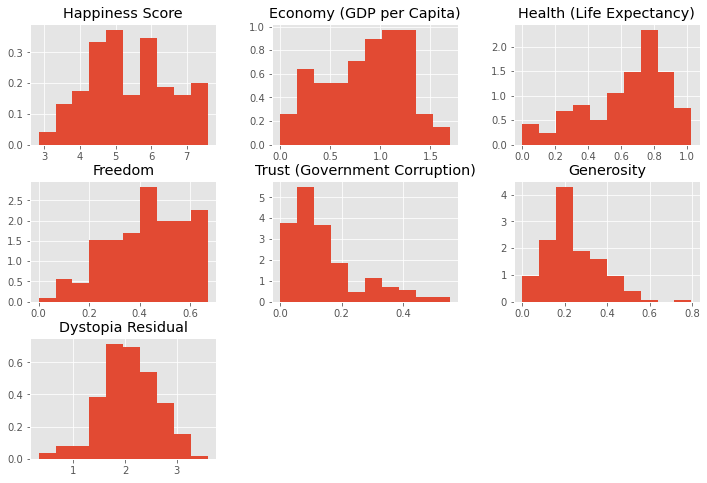

In [ ]:
df_2015[['Happiness Score', 'Economy (GDP per Capita)',
         'Health (Life Expectancy)', 'Freedom',
         'Trust (Government Corruption)','Generosity', 
         'Dystopia Residual']].hist(density=True, figsize=(12,8));

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


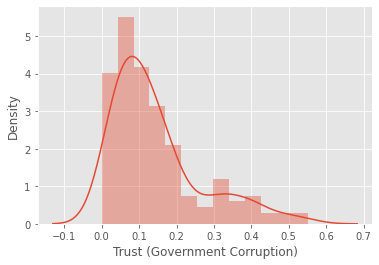

In [ ]:
sns.distplot(df_2015['Trust (Government Corruption)']);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


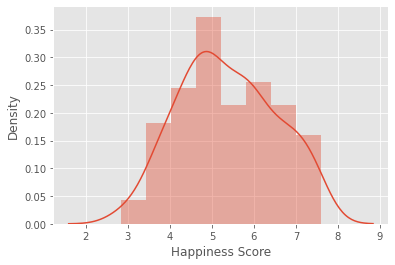

In [ ]:
sns.distplot(df_2015['Happiness Score']);

# Одновыборочные критерии

Проверим гипотезу о том, что медиана уровнея счастья равна $5$. 

$H_0\colon Med(X) = 5$

$H_1\colon Med(X) \ne 5$

In [ ]:
df_2015['Happiness Score'].describe()

count    158.000000
mean       5.375734
std        1.145010
min        2.839000
25%        4.526000
50%        5.232500
75%        6.243750
max        7.587000
Name: Happiness Score, dtype: float64

## __Критерий знаков__

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

x = df_2015['Happiness Score'].values
T, pvalue = sign_test(x, mu0=5)
T, pvalue


# The signs test returns
# M = (N(+) - N(-))/2

(14.0, 0.0313866360533696)

In [ ]:
# наблюдаемая статистика
T = np.sum(x>5)
T

93

In [ ]:
from scipy import stats

In [ ]:
# p-value
1-stats.binom.cdf(T, p=0.5, n=x.shape[0])

0.010376869583876847

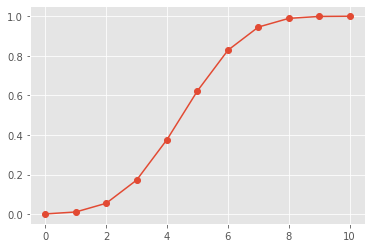

In [ ]:
x = range(0,11)
cdf = [(stats.binom.cdf(x, p=0.5, n=10)) for x in range(0,11)] 
plt.plot(x, cdf, 'o-');

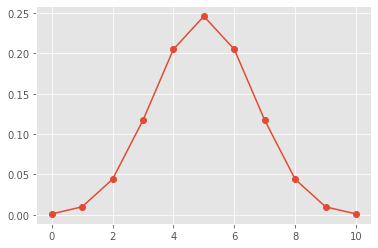

In [ ]:
x = range(0,11)
pdf = [(stats.binom.pmf(x, p=0.5, n=10)) for x in range(0,11)] 
plt.plot(x, pdf, 'o-');

In [ ]:
[(x,stats.binom.cdf(x, p=0.5, n=10)) for x in range(0,11)] 

[(0, 0.0009765625),
 (1, 0.010742187499999998),
 (2, 0.054687500000000014),
 (3, 0.17187499999999994),
 (4, 0.3769531250000001),
 (5, 0.6230468749999999),
 (6, 0.828125),
 (7, 0.9453125),
 (8, 0.9892578125),
 (9, 0.9990234375),
 (10, 1.0)]

Гипотеза отвергается. 

## __Критерий рангов Уилкоксона.__ 

In [ ]:
x = df_2015['Happiness Score'].values

In [ ]:
_, pvalue = stats.wilcoxon(x - 5)
pvalue

0.0003762684243784701

Гипотеза отвергается. 

# Двухвыборочные (несвязанные выборки) 

Правда ли, что в Европе уровень счастья выше, чем в Азии? 


In [ ]:
df_2015.Region.value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [ ]:
usl = df_2015.Region.apply(lambda w: 'Asia' in w)
x_asia = df_2015[usl]['Happiness Score']
x_asia.size

22

In [ ]:
usl = df_2015.Region.apply(lambda w: 'Europe' in w)
x_eur = df_2015[usl]['Happiness Score']
x_eur.size

50

## __Критерий рангов Манна-Уитни__

$H_0\colon f_{X}(x) = f_{Y}(x), \Delta= 0$

$H_1\colon f_{X}(x) = f_{Y}(x + \Delta), \Delta > 0$

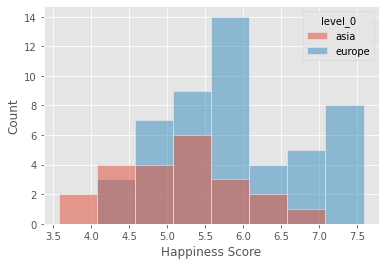

In [ ]:
sns.histplot(data=pd.concat([x_asia, x_eur], axis=0, keys=['asia','europe']).reset_index(),
             x='Happiness Score', hue='level_0');

In [ ]:
stats.mannwhitneyu(x_eur, x_asia, alternative='greater')

MannwhitneyuResult(statistic=774.0, pvalue=0.0031457735731103722)

In [ ]:
stats.ttest_ind(x_eur, x_asia)

Ttest_indResult(statistic=3.112555403882886, pvalue=0.002685378854280552)

Гипотеза отвергается. По этим данным, в Европе люди счастливее.

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


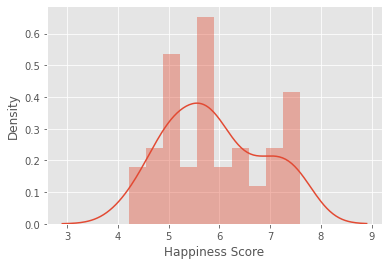

In [ ]:
sns.distplot(x_eur, bins=10);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


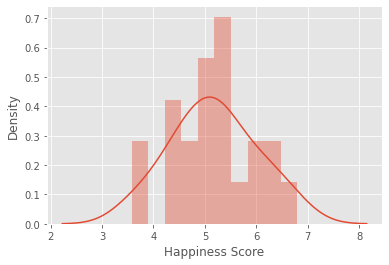

In [ ]:
sns.distplot(x_asia, bins=10);

Плтоности визуально различаются. Возможно, что мы использовали тест некорректно. Не помешает дополнительно проверить гипотезу о том, что обе выборки относятся к одному распределению: 

In [ ]:
stats.ks_2samp(x_eur, x_asia)

KstestResult(statistic=0.36727272727272725, pvalue=0.023484023767084583)

Гипотеза об одинаковом распределении отвергается. Другой путь: ориентироваться на здравый смысл, а он нам подсказывает, что, скорее всего, счастье не могло поменять свой закон распределения за пять лет. Хотя никто не гарантирует, что за этот период времени в формировании счастья не было никаких структурных сдвигов. 

# Двухвыборочные (связные выборки) 


Правда ли, что к 2019 году уровень счастья в мире вырос?

In [ ]:
df_2015 = pd.read_csv("../data/2015.csv")
df_2015 = df_2015[['Country','Happiness Score']]
df_2015.columns = ['Country', 'Happiness_2015']
df_2015.set_index('Country', inplace=True)

df_2019 = pd.read_csv("../data/2019.csv")
df_2019 = df_2019[['Country or region','Score']]
df_2019.columns = ['Country', 'Happiness_2019']
df_2019.set_index('Country', inplace=True)

df = df_2019.join(df_2015).dropna()
df.head()

,Happiness_2019,Happiness_2015
Country,,
Finland,7.769,7.406
Denmark,7.600,7.527
Norway,7.554,7.522
Iceland,7.494,7.561
Netherlands,7.488,7.378


In [ ]:
df.describe()

,Happiness_2019,Happiness_2015
count,149.000000,149.000000
mean,5.433872,5.378289
std,1.111243,1.157782
min,3.083000,2.839000
25%,4.548000,4.518000
50%,5.425000,5.253000
75%,6.198000,6.295000
max,7.769000,7.587000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


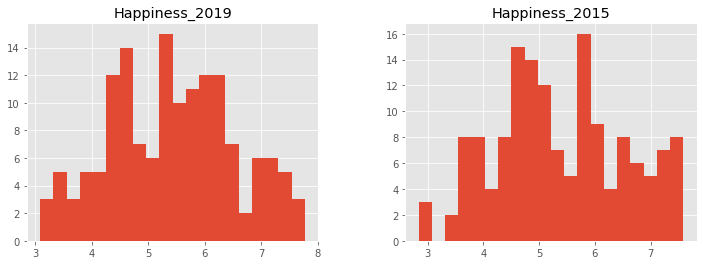

In [ ]:
df.hist(figsize=(12,4), bins=20);

## __Критерий знаков__

$H_0\colon P(X > Y) = 0.5$

$H_1\colon P(X > Y) \ne 0.5$

In [ ]:
_, pvalue = sign_test(df.Happiness_2019, df.Happiness_2015)
print(pvalue)

0.7432690217670561


Гипотеза об о том, что уровень счастья не изменился, не отвергается. 

## __Критерий рангов Уилкоксона__

$H_0\colon Med(X - Y) = 0$

$H_1\colon Med(X - Y) \ne 0$

In [ ]:
stats.wilcoxon(df.Happiness_2019, df.Happiness_2015)

WilcoxonResult(statistic=4948.0, pvalue=0.22554445938820344)

In [ ]:
# поменял местами года, и pvalue то же самое
stats.wilcoxon(df.Happiness_2015, df.Happiness_2019)

WilcoxonResult(statistic=4948.0, pvalue=0.22554445938820344)

Гипотеза об о том, что уровень счастья не изменился, не отвергается. 